In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

###########################

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Создание данных

In [1]:
import struct
import sys
from array import array
from os import path

# Загрузка данных (классификация)

In [ ]:
import struct
import sys
from array import array
from os import path
import torchvision
import os
import numpy as np
from PIL import Image

MNIST_PATH = 'Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-'

train_mnist = torchvision.datasets.MNIST(root=MNIST_PATH, train=True,  download=True)
test_minst  = torchvision.datasets.MNIST(root=MNIST_PATH, train=False, download=True)

def read(dataset):
    if dataset == 'training':
        path_img = MNIST_PATH+"/MNIST/raw/train-images-idx3-ubyte"
        path_lbl = MNIST_PATH+"/MNIST/raw/train-labels-idx1-ubyte"
    elif dataset == "testing":
        path_img = MNIST_PATH+"/MNIST/raw/t10k-images-idx3-ubyte"
        path_lbl = MNIST_PATH+"/MNIST/raw/t10k-labels-idx1-ubyte"
    else: 
        raise Exception("unknown dataset")        
        
    with open(path_lbl, 'rb' ) as f_label:
        _, size = struct.unpack(">II", f_label.read(8))
        lbl=array("b", f_label.read())
        
    with open(path_img, 'rb' ) as f_img:
        _, size, rows, cols = struct.unpack(">IIII", f_img.read(16))
        img=array("B", f_img.read())    
        
    return lbl, img, size, rows, cols    
    
    
def write_dataset(labels, data, size, rows, cols, output_dir):
    classes = {i: f"class_{i}" for i in range(10)}

    output_dirs = [
        path.join(output_dir, classes[i])  for i in range (10)
    ]
    for dir in output_dirs:
            if not path.exists(dir):
                os.makedirs(dir)
                
    for(i, label) in enumerate(labels):
        output_filename = path.join(output_dirs[label] , str(i)+".jpg")
        #printing is too slow
        #print("writing " + output_filename)
        
        with open(output_filename, "wb") as h:
            data_i = [
                data[ (i*rows*cols + j*cols): (i*rows*cols + (j+1)*cols)]
                for j in range(rows)
            ]
            data_array= np.asarray(data_i)            
            im = Image.fromarray(data_array)
            im.save(output_filename)
            
output_path = "content/mnist"            

for dataset in ["training", "testing"]:
    write_dataset(*read(dataset), path.join(output_path, dataset))

# Загрузка данных (регрессия)

In [ ]:
if not os.path.isdir("dataset"):
    os.mkdir("dataset")

img = np.random.randint(0,50, [100000, 64, 64], dtype = np.uint8)
square = np.random.randint(100, 200, [100000, 15, 15], dtype=np.uint8)

coords =  np.empty([100000, 2])

data = {}

for i in range(img.shape[0]):

    x = np.random.randint(20,44)
    y = np.random.randint(20,44)

    img[i, (y-7):(y+8), (x-7):(x+8)] = square[i]

    coords[i] = [y,x]

    name_img = f"ing_{i}.jpeg"
    path_img = os.path.join('dataset/',name_img)

    image = Image.fromarray(img[i])
    image.save(path_img)

    data[name_img] = [y,x]

with open ('dataset/coords.json', 'w') as f:
    json.dump(data, f, indent=2)
    

# Пользовательский класс для данных (Классификация)

In [ ]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset

class MNISTDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform

        self.len_dataset = 0
        self.data_list = []

        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = sorted(dir_list)
                self.class_to_idx = {
                    cls_name: i for i, cls_name in enumerate(self.classes)
                }
                continue

            # Используем os.path.basename для определения имени класса
            cls = os.path.basename(path_dir)

            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                if cls in self.class_to_idx:
                    self.data_list.append((file_path, self.class_to_idx[cls]))
                else:
                    raise KeyError(f"Class '{cls}' not found in class_to_idx.")

            self.len_dataset += len(file_list)

    def __len__(self):
        return self.len_dataset

    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = np.array(Image.open(file_path))

        if self.transform is not None:
            sample = self.transform(sample)

        return sample, target


In [ ]:
for path, dir_list, file_list in os.walk('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training'):
    print(f'class - {path.split("/")[-1]}')
    print(f' -- кол-во файлов {len(file_list)}')

In [ ]:
os.path.join('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training/class_2','1273.jpeg')

In [ ]:
train_data = MNISTDataset('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training')
test_data = MNISTDataset('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/testing')
train_data.classes

In [ ]:
img, one_hot_position = train_data[34433]

cls = train_data.classes[one_hot_position]
print(f'Класс - {cls}')
plt.imshow(img,cmap='gray')

In [ ]:
train_data, val_data = random_split(train_data, [0.8, 0.2])
print(len(train_data))
print(len(val_data))
print(len(test_data))

In [ ]:
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [ ]:
for i, (samples, target) in enumerate(train_loader):
    if i <3:
        print('Номер батча', i+1)
        print(f"Размер сэмпла = {samples.shape}")
        print(f"Размер таргета = {target.shape}")

print('--------------')

# Использование класса ImageFolder

In [ ]:
train_data = ImageFolder(root='/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/training')
test_data = ImageFolder(root='/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/mnist/testing')

In [ ]:
img, one_hot_position = train_data[34433]

cls = train_data.classes[one_hot_position]
print(f'Класс - {cls}')
plt.imshow(img,cmap='gray')

In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Данные для задачи регрессии

In [ ]:
class DatasetReg(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transforn = transform

        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')

        self.len_dataset = len(self.list_name_file)

        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)

    def __len__(self):
        return self.len_dataset
    
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)

        img = np.array(Image.open(path_img))
        coords = np.array(self.dict_coords[name_file])

        if self.transforn is not None:
            img = self.transforn(img)

        return img, coords
    

In [ ]:
dataset = DatasetReg('/Users/1/OneDrive - НИТУ МИСиС/Учебное/Pytorch_practice-/dataset')

In [ ]:
len(dataset)

100000

Координаты центра: [26 41]


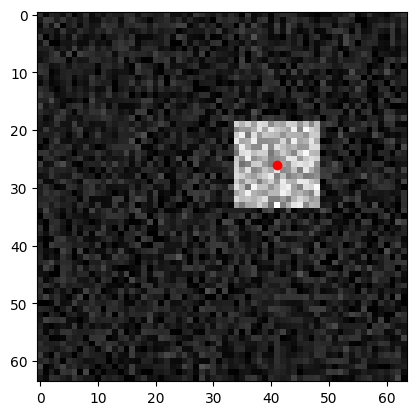

In [ ]:
img, coord = dataset[98850]
print(f"Координаты центра: {coord}")
plt.scatter(coord[1],coord[0], marker='o', color= 'red')
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
train_set, val_set, test_set = random_split(dataset, [0.7, 0.1, 0.2])

In [ ]:
print(len(train_set))
print(len(val_set))
print(len(test_set))

70000
10000
20000


In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)